<a href="https://colab.research.google.com/github/chanho-275/WOWS/blob/main/Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

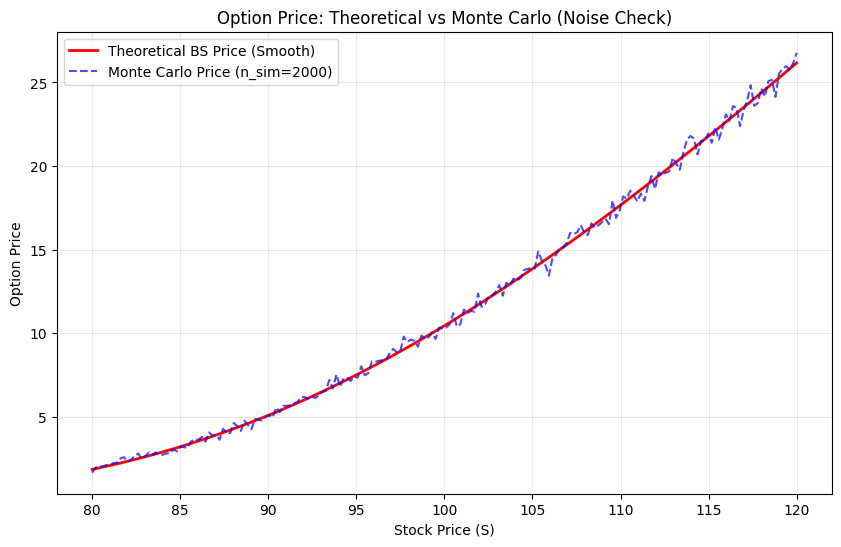

In [ ]:
# 블랙숄즈와 몬테카를로 콜옵션 pricing 비교

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. 블랙-숄즈 이론가 함수 (매끈한 곡선용)
def bs_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# 2. 파라미터 설정
K, T, r, sigma = 100, 1, 0.05, 0.2
S_range = np.linspace(80, 120, 200) # 주가 범위 80~120
n_sim = 2000 # 노이즈를 보여주기 위해 적당한 횟수 설정

# 3. 데이터 생성
theoretical_prices = [bs_call(s, K, T, r, sigma) for s in S_range]
mc_prices = []

# 난수 고정 (재현성)
rng = np.random.default_rng(42)

for s in S_range:
    # 각 주가 지점마다 n_sim번 던져서 평균 내기
    Z = rng.standard_normal(n_sim)
    ST = s * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)
    mc_prices.append(np.mean(payoffs))

# 4. 시각화
plt.figure(figsize=(10, 6))
plt.plot(S_range, theoretical_prices, 'r-', lw=2, label='Theoretical BS Price (Smooth)')
plt.plot(S_range, mc_prices, 'b--', alpha=0.7, label=f'Monte Carlo Price (n_sim={n_sim})')

plt.title('Option Price: Theoretical vs Monte Carlo (Noise Check)')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

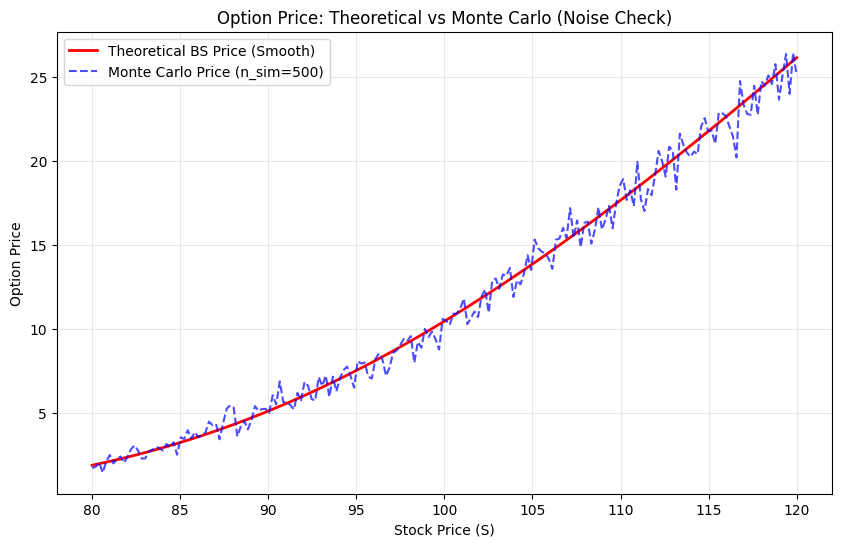

In [ ]:
# 시뮬레이션 적을 때

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. 블랙-숄즈 이론가 함수 (매끈한 곡선용)
def bs_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# 2. 파라미터 설정
K, T, r, sigma = 100, 1, 0.05, 0.2
S_range = np.linspace(80, 120, 200) # 주가 범위 80~120
n_sim = 500

# 3. 데이터 생성
theoretical_prices = [bs_call(s, K, T, r, sigma) for s in S_range]
mc_prices = []

# 난수 고정 (재현성)
rng = np.random.default_rng(42)

for s in S_range:
    # 각 주가 지점마다 n_sim번 던져서 평균 내기
    Z = rng.standard_normal(n_sim)
    ST = s * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)
    mc_prices.append(np.mean(payoffs))

# 4. 시각화
plt.figure(figsize=(10, 6))
plt.plot(S_range, theoretical_prices, 'r-', lw=2, label='Theoretical BS Price (Smooth)')
plt.plot(S_range, mc_prices, 'b--', alpha=0.7, label=f'Monte Carlo Price (n_sim={n_sim})')

plt.title('Option Price: Theoretical vs Monte Carlo (Noise Check)')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

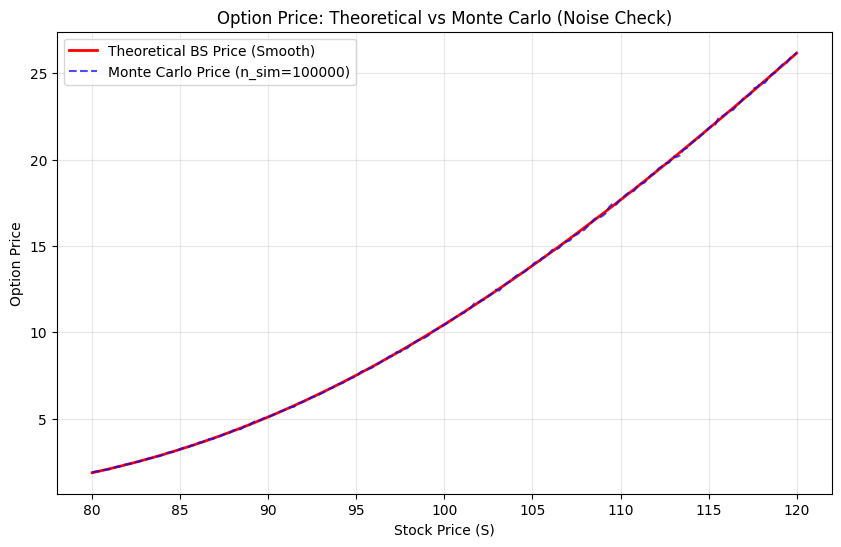

In [ ]:
# 시뮬레이션 많을

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. 블랙-숄즈 이론가 함수 (매끈한 곡선용)
def bs_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# 2. 파라미터 설정
K, T, r, sigma = 100, 1, 0.05, 0.2
S_range = np.linspace(80, 120, 200) # 주가 범위 80~120
n_sim = 100000 # 노이즈를 보여주기 위해 적당한 횟수 설정

# 3. 데이터 생성
theoretical_prices = [bs_call(s, K, T, r, sigma) for s in S_range]
mc_prices = []

# 난수 고정 (재현성)
rng = np.random.default_rng(42)

for s in S_range:
    # 각 주가 지점마다 n_sim번 던져서 평균 내기
    Z = rng.standard_normal(n_sim)
    ST = s * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)
    mc_prices.append(np.mean(payoffs))

# 4. 시각화
plt.figure(figsize=(10, 6))
plt.plot(S_range, theoretical_prices, 'r-', lw=2, label='Theoretical BS Price (Smooth)')
plt.plot(S_range, mc_prices, 'b--', alpha=0.7, label=f'Monte Carlo Price (n_sim={n_sim})')

plt.title('Option Price: Theoretical vs Monte Carlo (Noise Check)')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# 1 stock step-down ELS pricing

# 영업일 기준 날짜 세팅
import pandas as pd
import holidays
from datetime import datetime

# 대한민국 공휴일 불러오기
kor_holidays = list(holidays.KOR(years=range(2026, 2031)).keys())
kor_holidays = pd.to_datetime(kor_holidays)

# 오늘 날짜
today = pd.to_datetime(datetime.today().date())
six_months_later = today + pd.DateOffset(months=6)

# 6개월마다의 기준일 생성
month_starts = pd.date_range(start=six_months_later, periods=6, freq='6MS')

# 각 기준일에서 해당 월의 첫 번째 영업일(공휴일 제외) 추출
business_days = []
for dt in month_starts:
    # 시작 날짜부터 한 달간의 영업일 추출
    month_range = pd.date_range(start=dt, end=dt + pd.offsets.MonthEnd(0), freq='B')
    # 영업일이 대한민국의 휴일이 아닌 것을 다시 추출
    valid_days = [d for d in month_range if d not in kor_holidays]
    if valid_days: # 자료가 있다면
        business_days.append(valid_days[0])

from datetime import datetime

# 날짜 차이 계산 (단위: 일수)
days_diff = [(d - today).days for d in business_days]

# DataFrame 생성
df = pd.DataFrame({
    '영업일': [d.strftime('%Y-%m-%d') for d in business_days],
    '오늘까지 남은 일수': days_diff})
df


,영업일,오늘까지 남은 일수
0,2026-08-03,209
1,2027-02-01,391
2,2027-08-02,573
3,2028-02-01,756
4,2028-08-01,938
5,2029-02-01,1122


In [ ]:
def SD_lstar_CPU(S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim):
    import numpy as np
    from scipy.stats import norm


    # 주가 경로 생성
    N=T[-1] # 만기까지의 날짜수
    rng = np.random.default_rng(42)
    W = rng.standard_normal((N,sim))  # 표준 정규분포 난수
    dt=1/365

    # log(S) 행렬 만들기
    lnS=(r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * W

    # 앞에 붙이기
    lnS = np.insert(lnS,0,np.log(S), axis=0)
    # 누적합 구하기
    S=np.exp(np.cumsum(lnS,axis=0))

     # 수익률 행렬 변환
    R = S / kijun

    Price = np.zeros(sim)  # 최종 옵션 가격 배열

    EN=len(K) # 조기상환 회차수
    for i in range(EN):
        out = np.where((Price == 0) & (R[T[i], :] >= K[i]))  # 아직 상환되지 않은 경우만 선택
        # 조기상환된 경우 가격 업데이트
        Price[out] = 10000 * (1 + c[i]) * np.exp(-r * (T[i]) / 365)

    # 만기상환 테스트
    check = np.where(Price == 0)[0] # 아직 상환되지 않은 경우의 인덱스 추출
    print(f"만기까지 살아남은 개수: {len(np.where(Price == 0)[0])}")
    # 만기 손실 체크
    ki_count=0
    for idx in check:
        if np.min(R[:,idx]) < barrier: # 해당 sim 회차의 최소값이 배리어 미만이면?
            ki_count +=1
            # 배리어 하외 하면 R값으로 리턴
            Price[idx] = 10000 * (R[-1, idx]) * np.exp(-r * T[-1]/365)
        else: # 배리어를 한번도 친적이 없으면 마지막 쿠폰 지급
            Price[idx] = 10000 * (1 + dummy) * np.exp(-r * T[-1]/365)

    print('낙인 횟수 :', ki_count)
    # 정규분포 적합
    mu, s = norm.fit(Price)
    print(mu)


In [ ]:
import numpy as np
S= 700000
kijun= 700000
K= [0.95,0.95,0.95,0.90,0.90,0.85]
T= [209,391,573,756,938,1122]
c= np.array([1,2,3,4,5,6])*0.045
r= 0.0296
q= 0
sigma= 0.3
barrier= 0.7
dummy= 0.27
sim= 100000
SD_lstar_CPU(S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

만기까지 살아남은 개수: 17876
낙인 횟수 : 17841
9476.390356401802


In [ ]:
# 쿠폰 상향
import numpy as np
S= 700000
kijun= 700000
K= [0.95,0.95,0.95,0.90,0.90,0.85]
T= [209,391,573,756,938,1122]
c= np.array([1,2,3,4,5,6])*0.07
r= 0.0296
q= 0
sigma= 0.3
barrier= 0.7
dummy= 0.42
sim= 100000
SD_lstar_CPU(S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

만기까지 살아남은 개수: 17876
낙인 횟수 : 17841
9806.27274423451


In [ ]:
# 배리어 하향
import numpy as np
S= 700000
kijun= 700000
K= [0.95,0.95,0.95,0.90,0.90,0.85]
T= [209,391,573,756,938,1122]
c= np.array([1,2,3,4,5,6])*0.045
r= 0.0296
q= 0
sigma= 0.3
barrier= 0.55
dummy= 0.27
sim= 100000
SD_lstar_CPU(S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

만기까지 살아남은 개수: 17876
낙인 횟수 : 15187
9611.082393619225


In [ ]:
# 배리어 검증시 시그마 조정1
import numpy as np
S= 700000
kijun= 700000
K= [0.95,0.95,0.95,0.90,0.90,0.85]
T= [209,391,573,756,938,1122]
c= np.array([1,2,3,4,5,6])*0.045
r= 0.0296
q= 0
sigma= 0.6
barrier= 0.55
dummy= 0.27
sim= 100000
SD_lstar_CPU(S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

만기까지 살아남은 개수: 30097
낙인 횟수 : 30081
8183.405284330422


In [ ]:
# 배리어 검증시 시그마 조정1-2
import numpy as np
S= 700000
kijun= 700000
K= [0.95,0.95,0.95,0.90,0.90,0.85]
T= [209,391,573,756,938,1122]
c= np.array([1,2,3,4,5,6])*0.045
r= 0.0296
q= 0
sigma= 0.6
barrier= 0.7
dummy= 0.27
sim= 100000
SD_lstar_CPU(S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

만기까지 살아남은 개수: 30097
낙인 횟수 : 30097
8182.568228294242


In [ ]:
# 상환 조건 조정
import numpy as np
S= 700000
kijun= 700000
K= [0.95,0.90,0.90,0.90,0.85,0.85]
T= [209,391,573,756,938,1122]
c= np.array([1,2,3,4,5,6])*0.045
r= 0.0296
q= 0
sigma= 0.3
barrier= 0.7
dummy= 0.27
sim= 100000
SD_lstar_CPU(S, kijun, K, T, c, r, q, sigma, barrier, dummy, sim)

만기까지 살아남은 개수: 16235
낙인 횟수 : 16219
9543.059959943665
